## Introduction to Scikit-learn

**Objective:**

This assignment will help you get hands-on experience with Scikit-learn's basic functionalities, including loading datasets, data preprocessing, splitting datasets, training models, evaluating models, and tuning hyperparameters.

In [24]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

**Step 1: Load and Explore the Dataset**

In [26]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
data = load_iris()

# Convert to a Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display dataset details
print("Shape of dataset:", df.shape)
print("Feature names:", data.feature_names)
print("Target classes:", data.target_names)

# Display the first 5 rows
print(df.head())

Shape of dataset: (150, 5)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


**Step 2: Preprocess the Dataset**

In [28]:
# Use StandardScaler to scale the features so they have a mean of 0 and a standard deviation of 1.

from sklearn.preprocessing import StandardScaler

# Features and Target
X = df.iloc[:, :-1]  # Features
y = df['target']     # Target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled features (first 5 rows):\n", X_scaled[:5])

Scaled features (first 5 rows):
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


**Step 3: Split the Dataset**

In [30]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 120
Testing set size: 30


**Step 4: Train a Random Forest Classifier**

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


**Step 5: Evaluate the Model**

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Step 6: Tune Hyperparameters Using Grid Search**

In [36]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the tuned model on test data
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
print("Accuracy after tuning:", accuracy_score(y_test, y_pred_tuned))

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.95
Accuracy after tuning: 1.0


**Step 7: Visualize Feature Importance**

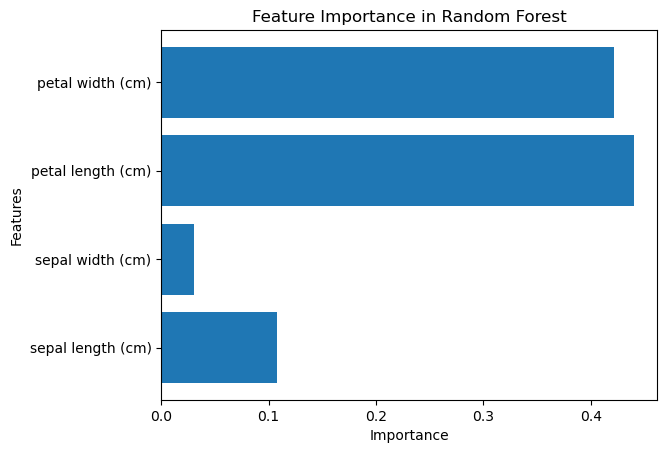

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = model.feature_importances_

# Plot feature importances
plt.barh(np.array(data.feature_names), feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()